In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import re

# Atur agar semua kolom terlihat
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.options.display.max_rows = None
pd.options.display.max_columns = None 


# df = pd.read_csv('AB_US_2023.csv')
# dt = pd.read_csv('AB_US_2020.csv')

# Data Understanding

In [2]:
df = pd.read_csv("airbnb-listings.csv", delimiter=";", low_memory=False)

In [3]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2","‪This luxurious apartment is situated in the centrum, just a 5-minute walk from Leidseplein. The modern apartment has 2 floors, 3 verdroomd and free WIFI. A wide variety restaurants and cafés is located in the direct surroundings, Rijksmuseum 10min walk and tramstop is 200 metres away.","In the heart of hip & lively Amsterdam Centrum/ Oud-West lies our sunny and spacious apartment. This luxurious apartment is situated perfectly in the Helmerbuurt neighbourhood, just a 5-minute walk from Leidseplein, Vondelpark and the Museum area. You will stay in the middle of Amsterdam but will have a good night sleep as the neighborhood is very peaceful. The location of the apartment in combination to the space that it offers is quite unique! Amsterdam city centre is your backyard! The modern 180 m2 apartment has 2 floors and a rooftarrace. On the lower floor is the light and spacious livingroom, a fully equipped kitchen and a separate toilet in the hallway. Ofcourse you will have wifi access, flat screens tv's and apple tv. The upper floor features 3 beautiful bedrooms; 2 of them with an amazing kingsize bed and the third with one single. The bathroom has a separate shower and a great bath and shampoo and soap is always provided! In the hallway is the 2nd separate toilet. You","‪This luxurious apartment is situated in the centrum, just a 5-minute walk from Leidseplein. The modern apartment has 2 floors, 3 verdroomd and free WIFI. A wide variety restaurants and cafés is located in the direct surroundings, Rijksmuseum 10min walk and tramstop is 200 metres away.",none,"There is a wide variety of cafes and restaurants is located in the direct surrounding of the apartment and the tram stop (which is 100 metres away) offers direct links to Anne Frank House, Dam Square and Central Station. Getting around is as easy as it can be from here. You can literally walk anywhere which is the most fun from my point of view, but you can also rent a bike from the bike rental downstairs. Getting a taxi is also easy and all lines of public transport are just around the corner.","Perfect location to enjoy Amsterdam's famous events like Gay Parade, Sail, IBC and Amsterdam Dance Events!",NaN,NaN,NaN,I expect you to treat my beloved apartment as you would like others to treat your own house and we will be fine! Please respect my lovely neighbors and neighbourhood...,https://a0.muscache.com/im/pictures/f3940538-4e50-484f-8645-28f56b352dd2.jpg?aki_policy=small,https://a0.muscache.com/im/pictures/f3940538-4e50-484f-8645-28f56b352dd2.jpg?aki_policy=medium,https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494954 entries, 0 to 494953
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              494954 non-null  object 
 1   Listing Url                     494954 non-null  object 
 2   Scrape ID                       494954 non-null  object 
 3   Last Scraped                    494953 non-null  object 
 4   Name                            494536 non-null  object 
 5   Summary                         478753 non-null  object 
 6   Space                           347018 non-null  object 
 7   Description                     494794 non-null  object 
 8   Experiences Offered             494954 non-null  object 
 9   Neighborhood Overview           291604 non-null  object 
 10  Notes                           197590 non-null  object 
 11  Transit                         303786 non-null  object 
 12  Access          

Cukup ambil yang usa aja

Buat dataset dengan menggunakan data dengan Country 'United States'

In [5]:
# Filter dataset hanya untuk Country "United States"
df_us = df[df["Country"] == "United States"].copy()

# Cek jumlah data setelah filter
print(f"Jumlah data setelah filter: {df_us.shape[0]} baris")

df_us.to_csv("airbnb-listings-us.csv", index=False)

Jumlah data setelah filter: 134545 baris


# Data Preprocessing

Pake data yang udah us doang

In [6]:
df = pd.read_csv('airbnb-listings-us.csv', low_memory=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134545 entries, 0 to 134544
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              134545 non-null  int64  
 1   Listing Url                     134545 non-null  object 
 2   Scrape ID                       134545 non-null  int64  
 3   Last Scraped                    134545 non-null  object 
 4   Name                            134496 non-null  object 
 5   Summary                         130351 non-null  object 
 6   Space                           96162 non-null   object 
 7   Description                     134499 non-null  object 
 8   Experiences Offered             134545 non-null  object 
 9   Neighborhood Overview           82577 non-null   object 
 10  Notes                           58726 non-null   object 
 11  Transit                         85060 non-null   object 
 12  Access          

In [8]:
# df.head()

## Handling Missing Values

Cek ada berapa misisng values

In [9]:
missing_values = df.isnull().sum() / len(df) * 100

print(missing_values)

ID                                 0.000000
Listing Url                        0.000000
Scrape ID                          0.000000
Last Scraped                       0.000000
Name                               0.036419
Summary                            3.117173
Space                             28.528002
Description                        0.034189
Experiences Offered                0.000000
Neighborhood Overview             38.624995
Notes                             56.352150
Transit                           36.779516
Access                            42.521833
Interaction                       44.639340
House Rules                       36.060798
Thumbnail Url                     17.807425
Medium Url                        17.807425
Picture Url                        0.074325
XL Picture Url                    17.807425
Host ID                            0.000000
Host URL                           0.000000
Host Name                          0.214055
Host Since                      

Drop kolom dengan missing values lebih dari 50% dan sekiranya tidak diperlukan

**Kolom dengan missing values > 50%:**

1. Notes – 56.35%
2. Host Acceptance Rate – 86.06%
3. Neighbourhood Group Cleansed – 66.87%
4. Square Feet – 98.44%
5. Weekly Price – 82.96%
6. Monthly Price – 79.59%
7. Security Deposit – 57.18%
8. Has Availability – 96.55%
9. License – 92.46%
10. Jurisdiction Names – 52.22%

cek semua kolom

In [10]:
df['Notes'].unique()

array([nan, 'Smokers please do not make inquiries.',
       "I'm accepting maximum weekly rental only. No monthly  Thank you",
       ...,
       'There are neighbors and we want to keep this place secure please do not talk on your phone outside thank you. Please do not smoke weed in the house, if you clean your self there will be no cleaning fee',
       'Well-Train friendly doberman present. No smoking indoors. If you want meals cook please let us know in advance (fees applies). If you need transportation please let us know in advance (fees applies). Pet allowed please let us know in advance (fee applies). 20.00 cleaning fee to clean the room only (optional).',
       'Yes, I have a roommate who shares the space, so the bathroom time needs to be communicated to one another.'],
      shape=(52326,), dtype=object)

In [11]:
df['Host Acceptance Rate'].unique()

array([nan, '80%', '36%', '100%', '89%', '25%', '99%', '0%', '97%', '67%',
       '96%', '87%', '61%', '95%', '88%', '53%', '85%', '84%', '93%',
       '86%', '57%', '78%', '73%', '94%', '98%', '55%', '72%', '63%',
       '82%', '76%', '50%', '33%', '83%', '92%', '91%', '45%', '69%',
       '64%', '47%', '71%', '70%', '90%', '65%', '77%', '54%', '81%',
       '39%', '40%', '52%', '20%', '79%', '43%', '75%', '60%', '68%',
       '66%', '46%', '42%', '58%', '56%', '29%', '48%', '62%', '44%',
       '49%', '41%', '23%', '51%', '59%', '38%', '31%', '13%', '30%',
       '9%', '74%', '19%', '17%', '15%', '28%', '32%', '21%', '27%',
       '12%', '22%', '10%', '14%', '35%', '24%', '18%'], dtype=object)

Mengapa Kolom "Notes" Dihapus?

- **Banyak missing values (~54%)**, sehingga sulit untuk diimputasi.
- **Isinya teks panjang dan tidak terstruktur**, yang kurang relevan untuk regresi harga.
- **Tidak memiliki hubungan langsung dengan "Price"**, karena lebih ke deskripsi tambahan.

In [12]:
df['Neighbourhood Group Cleansed'].unique()

array([nan, 'Queens', 'Bronx', 'Manhattan', 'Brooklyn', 'Staten Island',
       'Other neighborhoods', 'Central Area', 'University District',
       'Ballard', 'Queen Anne', 'Magnolia', 'Delridge', 'West Seattle',
       'Capitol Hill', 'Downtown', 'Cascade', 'Interbay', 'Beacon Hill',
       'Rainier Valley', 'Seward Park', 'Northgate', 'Lake City'],
      dtype=object)

In [13]:
df['Square Feet'].unique()

array([       nan, 1.9850e+03, 9.5000e+02, 5.0000e+02, 9.0000e+02,
       1.0000e+00, 7.0000e+02, 2.0000e+03, 1.0000e+01, 4.0000e+02,
       0.0000e+00, 1.1000e+03, 1.2000e+03, 1.2000e+02, 1.7500e+03,
       7.5000e+02, 8.0000e+02, 7.6200e+02, 8.5000e+02, 2.0000e+00,
       1.6000e+03, 1.5000e+03, 2.2220e+03, 5.0000e+03, 2.6500e+02,
       1.5830e+03, 1.3500e+03, 2.5000e+03, 6.5000e+02, 1.3000e+03,
       1.0700e+03, 1.0000e+03, 6.0000e+02, 7.8000e+02, 2.7000e+03,
       1.5000e+02, 9.6000e+02, 2.4000e+03, 4.1000e+02, 3.5000e+03,
       1.7000e+03, 3.4000e+03, 1.4000e+02, 3.2000e+03, 8.7500e+02,
       8.5000e+01, 1.5000e+01, 4.5000e+02, 3.5000e+02, 1.2500e+02,
       3.0000e+02, 2.0000e+02, 1.7200e+02, 1.8500e+03, 2.1000e+03,
       2.5000e+02, 1.2000e+01, 1.2500e+03, 5.5000e+02, 1.1000e+02,
       1.3200e+02, 3.9800e+02, 6.0000e+03, 9.2500e+02, 1.7500e+02,
       2.8500e+03, 9.9000e+02, 7.2500e+02, 1.6500e+03, 1.2600e+03,
       2.2000e+03, 1.4400e+02, 1.4000e+03, 5.2500e+02, 7.7000e

In [14]:
df['Weekly Price'].unique()

array([ nan, 490., 350., 560., 775., 720., 700., 575., 863., 500., 499.,
       800., 749., 900., 250., 598., 850., 550., 275., 987., 525., 737.,
       600., 650., 777., 339., 595., 695., 630., 400., 479., 699., 465.,
       665., 989., 845., 285., 799., 950., 320., 675., 580., 585., 226.,
       340., 637., 450., 265., 420., 220., 365., 255., 729., 825., 375.,
       784., 300., 643., 295., 875., 790., 588., 371., 380., 840., 274.,
       215., 335., 508., 534., 360., 475., 750., 345., 460., 190., 520.,
       425., 480., 187., 240., 768., 440., 455., 570., 666., 893., 385.,
       430., 599., 795., 395., 195., 537., 702., 387., 870., 369., 805.,
       898.,   0., 189., 120., 545., 390., 779., 995., 506., 299., 999.,
       547., 615., 399., 648., 880., 470., 351., 994., 438., 635., 925.,
       210., 625., 649., 175., 325., 256., 733., 827., 631., 260., 349.,
       992., 835., 725., 735., 280., 857., 740., 705., 208., 685., 393.,
       432., 262., 310., 330., 848., 222., 760., 99

In [15]:
df['Monthly Price'].unique()

array([  nan, 2100., 1350., ..., 4214., 2697., 4533.], shape=(1986,))

In [16]:
df['Security Deposit'].unique()

array([ nan, 300., 500., 100., 250.,  99., 200., 400., 499., 600., 350.,
       150., 750., 275., 107., 575., 298., 199., 110., 550., 120., 299.,
       565.,  95., 130., 450., 125., 399., 285., 700., 175., 159., 280.,
       800., 101., 149.,   0., 155., 135., 129., 900., 495., 375., 650.,
       625., 141.,  98., 225., 180., 173., 595., 115., 249., 140., 295.,
       995., 644., 850., 215., 325., 445., 333., 440., 195., 999., 736.,
       185., 258., 210., 785., 289., 522., 190., 444., 223., 134., 425.,
       455., 145., 111., 167., 246., 330., 795., 222., 675., 510., 108.,
       950., 257., 160., 264., 349., 475., 458., 119., 369., 240., 537.,
       695., 360., 194., 490., 480., 477., 449., 265., 117., 228., 220.,
       545., 189., 996., 198., 740., 245., 408., 525., 314., 109., 498.,
       980., 151., 179., 230., 229., 955.,  97., 599., 260., 148., 780.,
       420., 203., 219., 380., 990., 290., 201., 975., 307., 205., 127.,
       301., 153., 328., 164., 666., 335., 699., 46

In [17]:
df['Has Availability'].unique()

array([nan, 't'], dtype=object)

In [18]:
df['License'].unique()

array([nan, '#217399', '17STR-10324', ..., '223526', '217645', '2083758'],
      shape=(3296,), dtype=object)

In [19]:
df['Jurisdiction Names'].unique()

array(['City of Los Angeles, CA', nan, 'MALIBU', 'Santa Monica',
       'Louisiana State, New Orleans, LA', 'Louisiana State',
       'Illinois State, Cook County, IL, CHICAGO',
       'Illinois State, Cook County, IL', 'OAKLAND',
       'OREGON, MULTNOMAH, PORTLAND', 'OREGON',
       'OREGON, Washington County, OR, PORTLAND',
       'DISTRICT OF COLUMBIA, WASHINGTON',
       'DISTRICT OF COLUMBIA, STATE DEPARTMENT', 'SAN FRANCISCO',
       'WASHINGTON',
       'SAN DIEGO, SAN DIEGO TOURISM MARKETING DISTRICT A, SAN DIEGO TOURISM MARKETING DISTRICT B',
       'OREGON, MULTNOMAH', 'Montgomery County, MD',
       'Illinois State, Cook County, IL, Oak Park, IL',
       'Connecticut State', 'OREGON, PORTLAND',
       'OREGON, Washington County, OR', 'Colorado State',
       'OREGON, Lane County, OR, Eugene, OR', 'PALO ALTO', 'Jersey City',
       'Arkansas State'], dtype=object)

🧹 Data Cleaning: Menghapus Kolom dengan Banyak Missing Values

Sebelum melakukan analisis lebih lanjut, beberapa kolom dihapus berdasarkan kriteria berikut:
- **Memiliki missing values lebih dari 50%**, sehingga sulit untuk diimputasi.
- **Redundan atau tidak memberikan informasi tambahan yang signifikan**.
- **Kurang relevan untuk prediksi harga (`Price`)**.

✂️ Kolom yang Dihapus dan Alasannya:
- **Notes** → **56.35% missing**, berisi deskripsi tambahan dalam teks panjang yang tidak terstruktur dan kurang relevan untuk regresi harga.
- **Host Acceptance Rate** → **86.06% missing**, terlalu banyak data kosong, sulit diimputasi.
- **Neighbourhood Group Cleansed** → **66.87% missing**, redundan karena sudah ada kolom `Neighbourhood`.
- **Square Feet** → **98.44% missing**, hampir semua datanya kosong.
- **Weekly Price** → **82.96% missing**
- **Monthly Price** → **79.59% missing**
- **Security Deposit** → **57.18% missing**, tidak semua listing memiliki deposit, sehingga sulit diimputasi.
- **Has Availability** → **96.55% missing**, hanya ada sedikit data yang tersedia, tidak relevan.
- **License** → **92.46% missing**, terlalu banyak missing values.
- **Jurisdiction Names** → **52.22% missing**, informasi regulasi yang tidak relevan untuk prediksi harga.

In [20]:
df.drop(columns=[
    "Host Acceptance Rate", "Neighbourhood Group Cleansed", "Square Feet",
    "Weekly Price", "Monthly Price", "Security Deposit",
    "Has Availability", "License", "Jurisdiction Names", "Notes"
], inplace=True)

🧹 Data Cleaning: Menghapus Kolom Redundan dan Tidak Relevan

Selain menghapus kolom dengan banyak missing values, beberapa kolom lain juga dihapus karena:
- **Tidak memberikan informasi yang berguna untuk prediksi harga (`Price`)**.
- **Hanya berupa URL atau metadata yang tidak relevan**.
- **Redundan atau memiliki informasi yang sudah tercakup di kolom lain**.

✂️ Kolom yang Dihapus dan Alasannya:
- **Listing Url** → Hanya link, tidak memiliki nilai untuk analisis.
- **Scrape ID** → Metadata internal yang tidak berguna untuk model.
- **Thumbnail Url, Medium Url, Picture Url, XL Picture Url** → Hanya link gambar, tidak relevan untuk prediksi harga.
- **Host Thumbnail Url, Host Picture Url** → Foto host tidak memberikan insight ke harga listing.
- **Features** → Tidak jelas isi datanya

In [21]:
df.drop(columns=[
    "Listing Url", "Scrape ID", "Thumbnail Url", "Medium Url", 
    "Picture Url", "XL Picture Url", "Host Thumbnail Url", 
    "Host Picture Url", "Features"
], inplace=True)

Cek lagi semua kolom dan missing values nya

In [22]:
df.isnull().sum() / len(df) * 100

ID                                 0.000000
Last Scraped                       0.000000
Name                               0.036419
Summary                            3.117173
Space                             28.528002
Description                        0.034189
Experiences Offered                0.000000
Neighborhood Overview             38.624995
Transit                           36.779516
Access                            42.521833
Interaction                       44.639340
House Rules                       36.060798
Host ID                            0.000000
Host URL                           0.000000
Host Name                          0.214055
Host Since                         0.213312
Host Location                      0.652570
Host About                        36.009514
Host Response Time                22.875618
Host Response Rate                22.875618
Host Neighbourhood                16.108365
Host Listings Count                0.213312
Host Total Listings Count       

In [23]:
df['Host Location'].head()

0    Los Angeles, California, United States
1        Arcadia, California, United States
2    Los Angeles, California, United States
3    Los Angeles, California, United States
4    Los Angeles, California, United States
Name: Host Location, dtype: object

In [24]:
df['Host Location'].unique().tolist()

['Los Angeles, California, United States',
 'Arcadia, California, United States',
 'Paris, Île-de-France, France',
 'New York, New York, United States',
 'US',
 'West Hollywood, California, United States',
 nan,
 'Beverly Hills, California, United States',
 'California, United States',
 'Palos Verdes Peninsula, California, United States',
 'Venice, California, United States',
 'Venice Beach, CA United States',
 'Walnut, California, United States',
 'Marina del Rey, California, United States',
 'Santa Monica, California, United States',
 'Pasadena, California, United States',
 'Marina Del Rey, California, United States',
 'Chelsea, Massachusetts, United States',
 'United States',
 'Asheville, North Carolina, United States',
 'Claremont, California, United States',
 'Del Aire, California, United States',
 'Placentia, California, United States',
 'Farmington Hills, Michigan, United States',
 'Gardena, California, United States',
 'Rowland Heights, California, United States',
 'Seattle, Wa

In [25]:
df[['City', 'State', 'Country']] = df['Host Location'].str.split(', ',n = 2, expand=True)

In [26]:
df['Country'].isna().sum()

np.int64(17001)

In [27]:
df['Country'].fillna("United States", inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_18128\3030465352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna("United States", inplace=True)


In [28]:
df['Country'].isna().sum()

np.int64(0)

In [29]:
df['City'].head()

0    Los Angeles
1        Arcadia
2    Los Angeles
3    Los Angeles
4    Los Angeles
Name: City, dtype: object

In [30]:
df['City'].isna().sum()

np.int64(878)

In [31]:
df['State'].head()

0    California
1    California
2    California
3    California
4    California
Name: State, dtype: object

In [32]:
df['State'].isna().sum()

np.int64(15918)

In [33]:
df['State'].fillna(df['State'].mode()[0], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_18128\3160580533.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['State'].fillna(df['State'].mode()[0], inplace=True)


In [34]:
df['State'].isna().sum()

np.int64(0)

In [35]:
df['City'] = df['City'].fillna(
    df.groupby('State')['City'].transform(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")
)


In [36]:
df[df['City'] == 'Unknown'].sum()

ID                                  0
Last Scraped                        0
Name                                0
Summary                             0
Space                               0
Description                         0
Experiences Offered                 0
Neighborhood Overview               0
Transit                             0
Access                              0
Interaction                         0
House Rules                         0
Host ID                             0
Host URL                            0
Host Name                           0
Host Since                          0
Host Location                       0
Host About                          0
Host Response Time                  0
Host Response Rate                0.0
Host Neighbourhood                  0
Host Listings Count               0.0
Host Total Listings Count         0.0
Host Verifications                  0
Street                              0
Neighbourhood                       0
Neighbourhoo

In [37]:
df['City'].isna().sum()

np.int64(0)

In [38]:
df.isnull().sum() / len(df) * 100

ID                                 0.000000
Last Scraped                       0.000000
Name                               0.036419
Summary                            3.117173
Space                             28.528002
Description                        0.034189
Experiences Offered                0.000000
Neighborhood Overview             38.624995
Transit                           36.779516
Access                            42.521833
Interaction                       44.639340
House Rules                       36.060798
Host ID                            0.000000
Host URL                           0.000000
Host Name                          0.214055
Host Since                         0.213312
Host Location                      0.652570
Host About                        36.009514
Host Response Time                22.875618
Host Response Rate                22.875618
Host Neighbourhood                16.108365
Host Listings Count                0.213312
Host Total Listings Count       

In [39]:
df.drop('Host Location', axis=1, inplace=True)

In [40]:
df.isnull().sum() / len(df) * 100

ID                                 0.000000
Last Scraped                       0.000000
Name                               0.036419
Summary                            3.117173
Space                             28.528002
Description                        0.034189
Experiences Offered                0.000000
Neighborhood Overview             38.624995
Transit                           36.779516
Access                            42.521833
Interaction                       44.639340
House Rules                       36.060798
Host ID                            0.000000
Host URL                           0.000000
Host Name                          0.214055
Host Since                         0.213312
Host About                        36.009514
Host Response Time                22.875618
Host Response Rate                22.875618
Host Neighbourhood                16.108365
Host Listings Count                0.213312
Host Total Listings Count          0.213312
Host Verifications              

In [41]:
df['Host Since'].head(3)

0    2014-11-22
1    2016-02-02
2    2016-11-22
Name: Host Since, dtype: object

In [42]:
df['Host Since'].isna().sum()

np.int64(287)

karena pola host tiap daerah yang bisa berbeda, kita bisa mengisi missing value dengan median 'Host Since' per kota. Di daerah dengan banyak host lama, kemungkinan missing values juga mendekati 'Host Since' di daerah itu.

In [43]:
df['Host Since'] = pd.to_datetime(df['Host Since'])

df['Host Since'] = df.groupby('City')['Host Since'].transform(lambda x: x.fillna(x.median()))

In [44]:
df['Host Since'].isna().sum()

np.int64(0)

In [45]:
df['Host Since'].unique()

<DatetimeArray>
['2014-11-22 00:00:00', '2016-02-02 00:00:00', '2016-11-22 00:00:00',
 '2011-04-13 00:00:00', '2015-01-03 00:00:00', '2014-08-08 00:00:00',
 '2009-03-28 00:00:00', '2013-06-14 00:00:00', '2014-07-06 00:00:00',
 '2014-12-09 00:00:00', '2013-03-28 00:00:00', '2016-11-08 00:00:00',
 '2014-07-27 00:00:00', '2015-07-24 00:00:00', '2012-05-09 00:00:00',
 '2014-10-12 00:00:00', '2016-11-09 00:00:00', '2013-01-02 00:00:00',
 '2013-05-24 00:00:00', '2014-08-18 00:00:00', '2015-09-07 00:00:00',
 '2012-07-24 00:00:00', '2014-08-02 00:00:00', '2014-04-28 00:00:00',
 '2013-07-07 00:00:00', '2016-01-11 00:00:00', '2014-10-15 00:00:00',
 '2011-12-16 00:00:00', '2016-06-13 00:00:00', '2017-04-18 00:00:00',
 '2015-01-20 00:00:00', '2013-01-18 00:00:00', '2015-09-28 00:00:00',
 '2012-07-02 00:00:00', '2016-01-28 00:00:00', '2013-01-09 00:00:00',
 '2015-11-21 00:00:00', '2011-06-16 00:00:00', '2014-07-25 00:00:00',
 '2016-05-01 00:00:00', '2014-02-26 00:00:00', '2016-12-29 00:00:00',
 '20

In [46]:
df.isnull().sum() / len(df) * 100

ID                                 0.000000
Last Scraped                       0.000000
Name                               0.036419
Summary                            3.117173
Space                             28.528002
Description                        0.034189
Experiences Offered                0.000000
Neighborhood Overview             38.624995
Transit                           36.779516
Access                            42.521833
Interaction                       44.639340
House Rules                       36.060798
Host ID                            0.000000
Host URL                           0.000000
Host Name                          0.214055
Host Since                         0.000000
Host About                        36.009514
Host Response Time                22.875618
Host Response Rate                22.875618
Host Neighbourhood                16.108365
Host Listings Count                0.213312
Host Total Listings Count          0.213312
Host Verifications              

In [47]:
df['Host About'].head(4)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        NaN
1    A 25 year old Taiwanese/Korean American who loves to travel. Currently working as a property manager f

In [48]:
df['Host Response Time'].head(4)

0                   NaN
1          within a day
2    within a few hours
3    within a few hours
Name: Host Response Time, dtype: object

In [49]:
df['Host Response Time'].unique()

array([nan, 'within a day', 'within a few hours', 'within an hour',
       'a few days or more'], dtype=object)

In [50]:
df['Host Response Time'].isna().sum()

np.int64(30778)

City dipilih sebagai faktor yang mempengaruhi Host Response Time karena lokasi geografis dapat mencerminkan karakteristik host dan pola bisnis mereka. Di kota besar seperti New York atau Los Angeles, banyak host yang mengelola properti secara profesional dengan tingkat respons yang tinggi, sementara di kota kecil atau daerah terpencil, host cenderung lebih santai dan kurang aktif dalam memantau pemesanan. Selain itu, faktor infrastruktur seperti akses internet, regulasi lokal terkait Airbnb, serta volume permintaan di setiap kota juga dapat mempengaruhi seberapa cepat host merespons tamu. Dengan mempertimbangkan city sebagai variabel, model dapat menangkap pola ini dan memberikan prediksi yang lebih akurat terhadap host response time.

In [51]:
df['Host Response Time'] = df.groupby('City')['Host Response Time'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else df['Host Response Time'].mode()[0])
)


In [52]:
df['Host Response Time'].isnull().sum()

np.int64(0)

In [53]:
df['Host Response Rate'].unique()

array([ nan, 100.,  88.,  92.,  90.,  75.,  79.,  70.,  98.,  99.,  97.,
        94.,  85.,  91.,  96.,  82.,  67.,  83.,  33.,  89.,  95.,  93.,
         0.,  50.,  80.,  87.,  86.,  76.,  63.,  81.,  57.,  78.,  84.,
        60.,  11.,  25.,  14.,  40.,  56.,  73.,  58.,  20.,  71.,  54.,
        77.,  36.,  72.,  66.,  30.,  53.,  61.,  44.,  29.,  42.,  43.,
        38.,  64.,  10.,  31.,  55.,  13.,  69.,  59.,  65.,  68.,  74.,
        46.,  17.,  47.,   3.,  18.,   7.,  52.,  22.,  48.,  27.,  62.,
         5.,  32.,  23.,   9.,  41.,  49.,  15.,  35.,   4.,  39.,  51.,
        24.,  19.,  45.,  34.,   8.,  28.,   6.])

In [54]:
df['Host Response Rate'].isna().sum()

np.int64(30778)

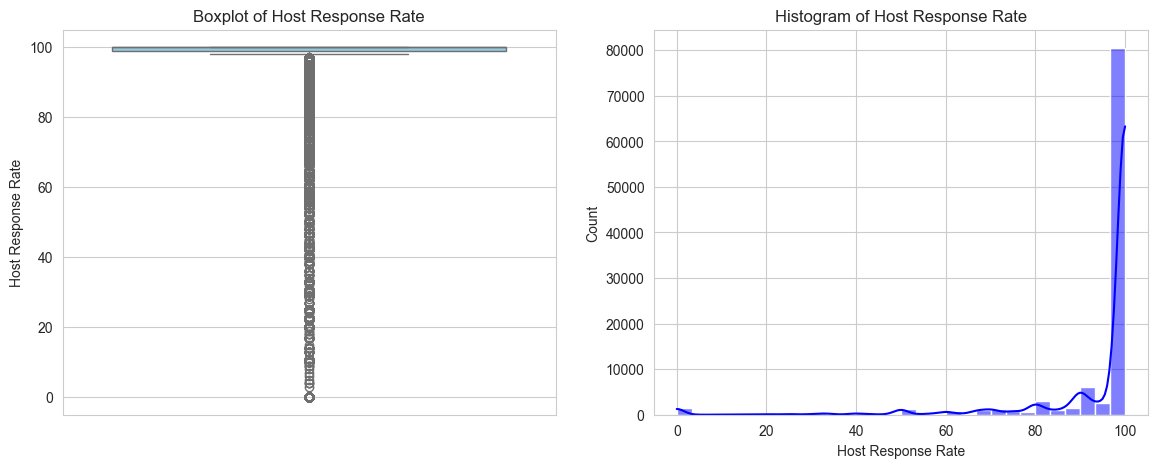

In [55]:
sns.set_style("whitegrid")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))


sns.boxplot(y=df['Host Response Rate'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Host Response Rate')


sns.histplot(df['Host Response Rate'], bins=30, kde=True, ax=axes[1], color='blue')
axes[1].set_title('Histogram of Host Response Rate')


plt.show()

In [56]:
df['Host Response Rate'].fillna(df['Host Response Rate'].mean(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_18128\4202744509.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Host Response Rate'].fillna(df['Host Response Rate'].mean(), inplace=True)


In [57]:
df.isnull().sum() / len(df) * 100

ID                                 0.000000
Last Scraped                       0.000000
Name                               0.036419
Summary                            3.117173
Space                             28.528002
Description                        0.034189
Experiences Offered                0.000000
Neighborhood Overview             38.624995
Transit                           36.779516
Access                            42.521833
Interaction                       44.639340
House Rules                       36.060798
Host ID                            0.000000
Host URL                           0.000000
Host Name                          0.214055
Host Since                         0.000000
Host About                        36.009514
Host Response Time                 0.000000
Host Response Rate                 0.000000
Host Neighbourhood                16.108365
Host Listings Count                0.213312
Host Total Listings Count          0.213312
Host Verifications              

In [58]:
df['Host Neighbourhood'].unique()

array(['Woodland Hills/Warner Center', 'Studio City', nan, ...,
       'Knightsbridge', 'Poblacion', 'Pudong'],
      shape=(1399,), dtype=object)

In [59]:
df['City'].unique()

array(['Los Angeles', 'Arcadia', 'Paris', ..., 'Talisay City',
       'Willemstad',
       'this house is close to Malibu beach and with the private pool and beautiful city view. you live her like your own home. the room is very clear and quiet. enjoy your trip.'],
      shape=(2359,), dtype=object)

In [63]:
df['City'].value_counts()

City
New York                                                                                                                                                                                                                                                           33264
Los Angeles                                                                                                                                                                                                                                                        19471
US                                                                                                                                                                                                                                                                 13642
Austin                                                                                                                                                                                                  

In [60]:
df['Host Neighbourhood'] = df.groupby('City')['Host Neighbourhood'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))

## yang hasilnya unknown berarti outliers

In [62]:
df[df['Host Neighbourhood']== 'Unknown'].count()

ID                                651
Last Scraped                      651
Name                              650
Summary                           643
Space                             402
Description                       651
Experiences Offered               651
Neighborhood Overview             348
Transit                           351
Access                            316
Interaction                       284
House Rules                       373
Host ID                           651
Host URL                          651
Host Name                         651
Host Since                        651
Host About                        345
Host Response Time                651
Host Response Rate                651
Host Neighbourhood                651
Host Listings Count               651
Host Total Listings Count         651
Host Verifications                649
Street                            651
Neighbourhood                       0
Neighbourhood Cleansed            651
City        